Progetto Data Mining A.A. 2019/2020
=====

Asteroidi e comete: analisi del diametro, dell'orbita e della pericolosità
---

Francesco Pasceri matricola 204963

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import os
from pandas.plotting import scatter_matrix
import dataframe_image as dfi
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

print('imported')

imported


In [2]:
# size label grafici
SMALL_SIZE = 14
MEDIUM_SIZE = 15
BIGGER_SIZE = 16

Fase 1: Analisi del dataset ed esplorazione dei dati
---

## 1. Import data


<b><u>Sfruttando la libreria pandas preleviamo il dataset fornito dal Jet Propulsion Lab:</u> [link](https://ssd.jpl.nasa.gov/sbdb_query.cgi#x)</b>

In [3]:
data_org = pd.read_csv('jpl_db.csv', low_memory=False)
print(data_org.shape)

data = data_org.copy()

dfi.export(data_org.head(10),"4_dataset.png")
data_org.head()

(999038, 27)


,full_name,neo,pha,H,G,M1,diameter,albedo,rot_per,GM,...,ad,n,per_y,moid,moid_jup,t_jup,class,first_obs,n_obs_used,condition_code
0,1 Ceres (A801 AA),N,N,3.40,0.12,NaN,939.400,0.0900,9.074170,62.6284,...,2.979647,0.213885,4.608202,1.59478,2.09753,3.309,MBA,1995-01-05,1030.0,0
1,2 Pallas (A802 FA),N,N,4.20,0.11,NaN,545.000,0.1010,7.813200,14.3000,...,3.411748,0.213345,4.619880,1.23429,1.85093,3.042,MBA,1804-08-27,8477.0,0
2,3 Juno (A804 RA),N,N,5.33,0.32,NaN,246.596,0.2140,7.210000,NaN,...,3.353865,0.226129,4.358696,1.03429,2.18899,3.299,MBA,1804-10-17,7188.0,0
3,4 Vesta (A807 FA),N,N,3.00,0.32,NaN,525.400,0.4228,5.342128,17.8000,...,2.570926,0.271609,3.628837,1.13948,2.46988,3.535,MBA,1950-09-23,9397.0,0
4,5 Astraea (A845 XA),N,N,6.90,NaN,NaN,106.699,0.2740,16.806000,NaN,...,3.065455,0.238661,4.129814,1.09575,1.95968,3.396,MBA,1845-12-15,3034.0,0


<b><u>
    Possiamo osservare che è una collezione di record in cui ogni attributo esprime una misura fisica di interesse.<br />
Controlliamo quindi la composizione del dataset in merito a tutti i singoli attributi e cerchiamo di capire la misura fisica espressa </u></b>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999038 entries, 0 to 999037
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       999038 non-null  object 
 1   neo             995538 non-null  object 
 2   pha             955093 non-null  object 
 3   H               989544 non-null  float64
 4   G               119 non-null     float64
 5   M1              1451 non-null    float64
 6   diameter        140299 non-null  float64
 7   albedo          139035 non-null  float64
 8   rot_per         23110 non-null   float64
 9   GM              14 non-null      float64
 10  e               999038 non-null  float64
 11  a               997209 non-null  float64
 12  q               999038 non-null  float64
 13  i               999038 non-null  float64
 14  om              999038 non-null  float64
 15  w               999038 non-null  float64
 16  ma              997208 non-null  float64
 17  ad        

##### <u> Diamo una breve introduzione alla nomenclatura degli attributi per avere più chiara la loro semantica </u>
    full_name : Nomenclatura del corpo 
    neo : (Near Earth Object) Parametro binario per identificare un corpo che orbita vicino la Terra
    pha : (Potentially Hazardous Asteroid) Parametro Y/N per corpo che può potenzialmente impattare sulla Terra
    H : Magnitudo assoluta [1 au da Terra e dal Sole]
    G : Inclinazione della magnitudo (default = 0.15)
    M1 : Magnitudo cometa (può coincidere con H)
    diameter : diametro del corpo (km)
    albedo : Albedo geometrico [rapporto tra la luminosità corpo e oggetto completamente riflettente]
    rot_per : Periodo del moto di rotazione (years)
    GM : Parametro gravitazionale (km^3/s^2) 
    e : Eccentricità       
    a : Semiasse maggiore dell'orbita(au)
    q : Distanza del perielio (au)
    i : Inclinazione orbita (deg)
    om : Longitudine del nodo ascendente (deg)
    w : Angolo del perielio (deg)     
    ma : Anomalia media [angolo dell'orbita in rapporto al "cerchio ausiliario"]
    ad : Distanza dell'afelio (au)
    n : Moto medio (deg/day) [corrisponde all velocità angolare per orbite circolari]
    per_y : Periodo di rivoluzione
    moid : Distanza dei due punti più vicini dell'orbita del corpo e della Terra
    moid_jup : Come il moid ma calcolato con riferimento a Giove
    t_jup : Parametro di Tisserand, valuta la perturbazione dell'orbita dovuta a Giove
    class : Classificazione orbitale del corpo
    first_obs : Data di prima osservazione
    n_obs_used : Numero di osservazioni totali dell'oggetto
    condition_code : Indica l'incertezza sulla conoscenza dell'orbita

In [5]:
data.describe()

,H,G,M1,diameter,albedo,rot_per,GM,e,a,q,...,om,w,ma,ad,n,per_y,moid,moid_jup,t_jup,n_obs_used
count,989544.000000,119.000000,1451.000000,140299.000000,139035.000000,23110.000000,1.400000e+01,999038.000000,9.972090e+05,999038.000000,...,999038.000000,999038.000000,997208.000000,996819.000000,997209.000000,9.966760e+05,9.566670e+05,955937.000000,996898.000000,998967.000000
mean,16.935897,0.178739,11.083804,5.448702,0.129876,19.356383,7.821928e+00,0.158493,-3.781949e-01,2.392337,...,168.343898,181.228833,177.065101,7.427516,0.236035,3.534348e+02,1.416264e+00,2.282434,3.382465,252.856442
std,1.789497,0.134603,3.875523,9.305669,0.110223,68.853512,1.678880e+01,0.103621,1.756917e+03,2.123257,...,102.903136,103.843471,106.432958,736.103282,0.079819,1.477791e+05,2.153880e+00,1.860484,0.331054,391.949014
min,-1.100000,-0.250000,4.000000,0.002500,0.001000,0.003298,2.100000e-09,0.000000,-1.092972e+06,0.001100,...,0.000000,0.000130,-70.703676,0.653773,0.000000,4.139405e-01,4.544120e-07,0.000002,-4.118000,2.000000
25%,16.100000,0.100000,7.900000,2.756000,0.053000,3.997150,1.022225e-03,0.091979,2.389318e+00,1.971555,...,80.531929,91.205507,82.559503,2.784055,0.189035,3.693771e+00,9.798560e-01,1.913970,3.214000,49.000000
50%,16.900000,0.190000,10.900000,3.940000,0.078000,6.282000,6.192500e-01,0.144960,2.649898e+00,2.228820,...,159.541854,182.195617,175.030363,3.050548,0.228449,4.313964e+00,1.242200e+00,2.204370,3.344000,105.000000
75%,17.800000,0.250000,13.700000,5.721000,0.188000,11.874750,6.500000e+00,0.201004,3.006298e+00,2.582095,...,252.227991,271.306984,270.643050,3.368090,0.266817,5.212602e+00,1.594980e+00,2.458680,3.503000,269.000000
max,33.200000,0.600000,23.700000,939.400000,1.000000,3240.000000,6.262840e+01,3.356215,2.522238e+05,80.398819,...,359.999793,359.999646,427.830619,504443.247931,2.381082,1.266739e+08,7.947660e+01,75.777100,10.179000,30438.000000


<b><u>Alcune degli attributi hanno troppi pochi valori per essere interessanti per cui non li consideriamo.
<br/>
Inoltre, definiamo un metodo per azzerare modifiche sui dati ed esplorare in maniera "pulita" altri attributi.</u></b>

In [6]:
def reset():
    data = data_org.copy()
    #remove meaningless rows
    data = data[data.diameter.notnull()]
    data = data[data.albedo.notnull()]
    data = data[data.H.notnull()]
    data = data[data.pha.notnull()]
    data = data[data.neo.notnull()]
    
    #converting into numerical
    data['moid'] = pd.to_numeric(data['moid'])
    data['neo'] = pd.to_numeric(data['neo'].map(dict(Y=1, N=0)))
    data['pha'] = pd.to_numeric(data['pha'].map(dict(Y=1, N=0)))

    #removing columns useless
    vect = np.asarray(pd.DataFrame(data.isnull().sum() / data.shape[0]).T).flatten()
    colstoRem = np.asarray(np.where(vect>0.5)).flatten().tolist()
    data.drop(data.columns[colstoRem], axis=1, inplace=True)
    
    # trasforming class attribute
    classes = data['class'].unique()
    codes = np.arange(classes.shape[0])
    dict_classes = {}
    for key,val in zip(classes, codes):
        dict_classes[key] = val
    #print(dict_classes)
    
    # transforming attributes from objects to numbers
    data['class'] = pd.to_numeric(data['class'].map(dict_classes))
    data['condition_code'] = pd.to_numeric(data['condition_code'])
    return data

data = reset()

## 2. Osservazioni

<b><u>
Dopo aver introdotto il dataset, per iniziare l'analisi cerchiamo di capire qual è stata e qual è la tendenza dell'uomo a studiare questi corpi di piccole dimensioni.
</u></b>

In [7]:
data = data_org.copy()

In [8]:
data['first_obs'] = data['first_obs'].str.replace('(\?\?)', '01')
data = data.loc[ data['first_obs'] >= '1800-01-01']
data['first_obs'] = pd.to_datetime( data['first_obs'] ).dt.year

yrs = data['first_obs'].unique()
yrs = np.sort(yrs)

data['count'] = 0
total_years = data[ data['first_obs'].isin( yrs ) ].groupby( ['first_obs'] ).count()['count']

data['neo_count'] = 0
total_neo = data[ data['neo'].isin( ['Y'] ) ].groupby( ['first_obs'] ).count()['neo_count']

data['pha_count'] = 0
total_pha = data[ data['pha'].isin( ['Y'] ) ].groupby( ['first_obs'] ).count()['pha_count']

p_total_years = pd.concat([total_years, total_pha, total_neo], axis=1 )
p_total_years = p_total_years.fillna(0)

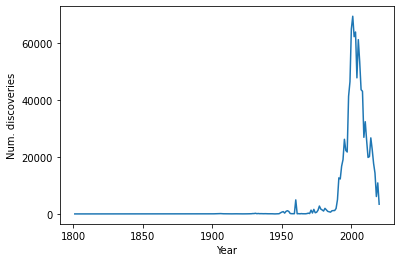

In [9]:
y = p_total_years['count']
plt.plot(yrs, y)
plt.rc('font', size=BIGGER_SIZE)
plt.xlabel('Year')
plt.ylabel('Num. discoveries')
plt.savefig('1_Discoveries_over_years.png')
plt.show()

<b><u>
Come si evince dal grafico, a partire dal 1801, quando fu scoperto il primo corpo di piccole dimensioni, l'interesse nel loro studio è cresciuto in maniera molto evidente. 
    
Prima del 1969, data dello sbarco sulla Luna, le osservazioni degli asteroidi furono mirate a capire il loro movimento, la loro dinamica e meccanica con lo scopo di capirne il movimento e applicarlo poi ai progressi in campo aerospaziale (prime missioni come Sputnik, lander lunari, Apollo, Soyuz, satelliti geostazionari, satelliti militari, etc. etc.).

Capito il meccanismo di movimento nello spazio, iniziò, anche con la nascita di nuove tecnologie (telescopio Hubble, sonda Voyager, telescopio Kepler, etc.) una nuova fase di esplorazione spaziale anche tramite ricerche fatte sulla Terra. Il motivo fu, questa volta, quello di catturare più informazioni riguardo questi corpi, capirne la struttura chimica, studiarne la storia e anche anticiparne il movimento per eventuali impatti con il nostro pianeta. 
</u></b>

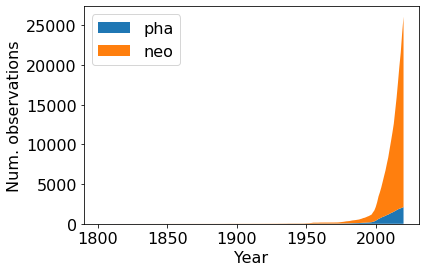

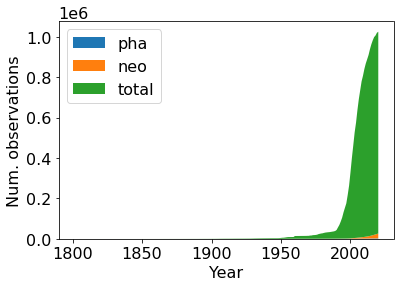

In [10]:
# y = [ total discoveries, discoveries of PHAs, discovery of NEOs ]
y1 = np.cumsum( p_total_years['pha_count'] ) 
y2 = np.cumsum( p_total_years['neo_count'] )
y3 = np.cumsum( p_total_years['count'] )
x = yrs

plt.stackplot( x, y1, y2, labels=['pha','neo'] )
plt.legend( loc='upper left' )
plt.rc('font', size=BIGGER_SIZE)
plt.xlabel('Year')
plt.ylabel('Num. observations')
plt.savefig('2_neo_pha_types.png')
plt.show()

plt.stackplot( x, y1, y2, y3,labels=['pha','neo','total'] )
plt.legend( loc='upper left' )
plt.rc('font', size=BIGGER_SIZE)
plt.xlabel('Year')
plt.ylabel('Num. observations')
plt.savefig('2_neo_pha_types_2.png')
plt.show()

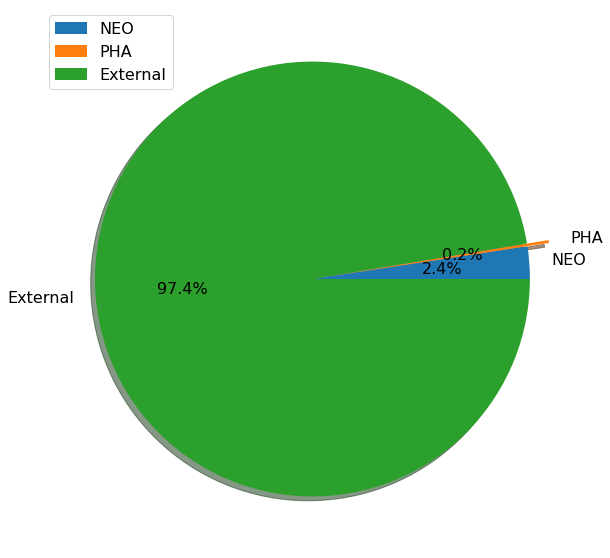

In [11]:
# Bring last element = total number
c1 = y1.values[-1] #pha
c2 = y2.values[-1] #neo
c3 = y3.values[-1] #total

labels = 'NEO', 'PHA', 'External'
sizes = [c2, c1, c3-c2-c1]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.figure(figsize=(10,10))
plt.rc('font', size=BIGGER_SIZE)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.legend( loc='upper left' )
plt.savefig('3_pie_chart.png')
plt.show()

<b><u>
Ad oggi, lo studio degli asteroidi è ancora vivo, ci si interessa particolarmente ai corpi vicini, definiti NEO, che rappresentano circa il 2.4% del totale, piuttosto che studiare in manira più approfondita quelli oltre la MBA (Main Belt Asteroid), ovvero la fascia di asteroidi presenti tra Marte e Giove.
    
Alcune delle missioni più importanti avviate dalla collaborazione di grandi aziende, private e non, sono quelle volte alla difensa della Terra dagli asteroidi PHA, ovvero quelli potenzialmente dannosi. La prima missione che verrà lanciata, nel 2024, è HERA formata da due componenti DART[Double Asteroid Redirection Test] e AIDA[Asteroid Impact and Deflection Assessment], volti il primo a creare l'impatto con il corpo e il secondo a studiarne la eventuale nuova traiettoria.

Sono molti, tuttavia, i motivi per cui l'interesse verso questi corpi celesti di piccole dimensioni è ancora acceso. Prima di svolgere attività di deduzione sul dataset, però, studiamo alcuni degli attributi interessanti e vediamo eventuali caratteristiche.
</u></b>

## 3. Esplorazione degli attributi: Correlazione

<b><u>
Il primo passo per l'analisi degli attributi più importanti è cercare di capire da subito se vi sono delle correlazioni. Tuttavia, l'obiettivo del progetto è quello di studiare tre principali attributi definendoli come <i>"target"</i>:
    1. Diametro
    2. Classe orbitale
    3. PHA
</u></b>

In [12]:
data = reset()

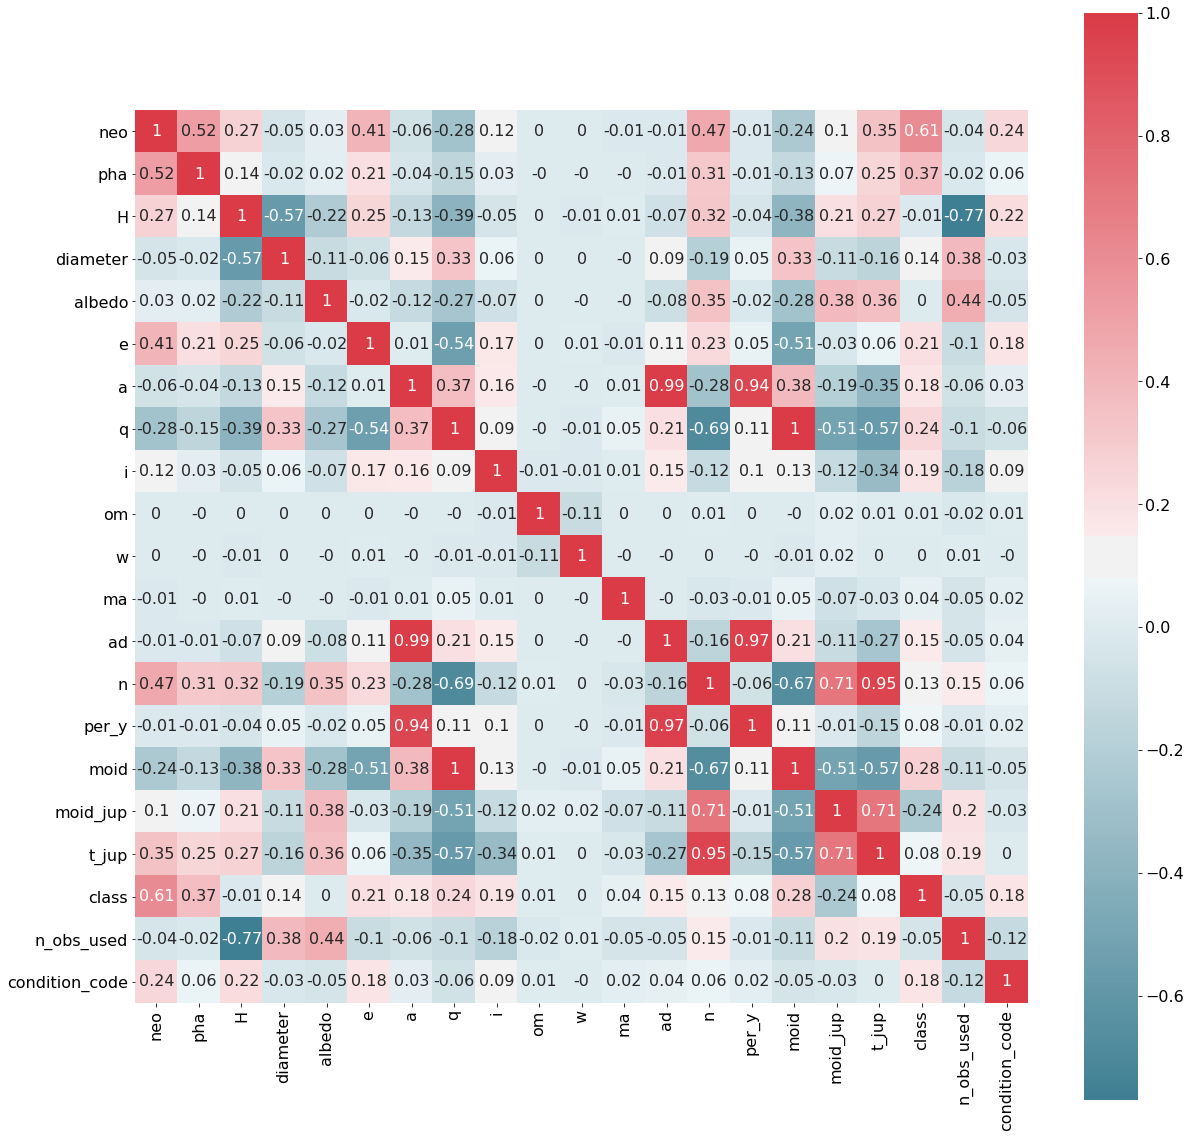

In [13]:
corr = data.corr()
corr = np.round(corr,2)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.savefig('6_correlation_matrix')

### 1. Diametro

<b><u>
Come primo interesse studiamo il diametro. In particolare i valori presenti nel dataset e le relazioni con altri attributi.
</b></u>

In [14]:
data = reset()

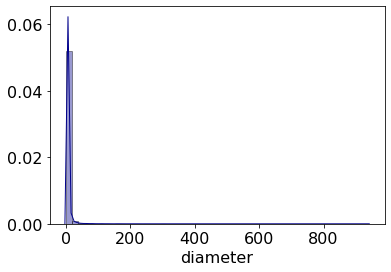

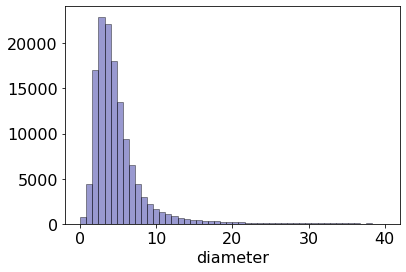

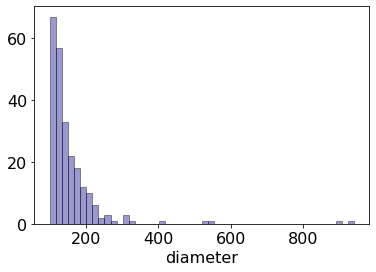

In [15]:
sns.distplot(data['diameter'], kde=True, hist=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
plt.savefig('7_diameter_hists.png')
plt.rc('font', size=BIGGER_SIZE)
plt.show()

sns.distplot( data[ data['diameter']<=40 ]['diameter'], hist=True, kde=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
plt.savefig('8_diameter_hists_zoom.png')
plt.rc('font', size=BIGGER_SIZE)
plt.show()

sns.distplot( data[ data['diameter']>=100 ]['diameter'], hist=True, kde=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
plt.savefig('8_diameter_hists_zoomAlto.png')
plt.rc('font', size=BIGGER_SIZE)
plt.show()

<b><u>
Dallo studio degli istogrammi e della densità possiamo notare come moltissimi dei record presentano un valore del diametro piccolo e pochi sono invece quelli molto grandi (ad esempio Cerere e Huamea). Eseguendo un <i>zoom</i> in particolare sulla zona di diametri piccoli, possiamo notare come la dimensione si attesti intorno ai 3/4/5 km.
</b></u>

In [16]:
data = data[data.diameter.notnull()]
corr['diameter'].sort_values(ascending=False)
corr['diameter']

neo              -0.05
pha              -0.02
H                -0.57
diameter          1.00
albedo           -0.11
e                -0.06
a                 0.15
q                 0.33
i                 0.06
om                0.00
w                 0.00
ma               -0.00
ad                0.09
n                -0.19
per_y             0.05
moid              0.33
moid_jup         -0.11
t_jup            -0.16
class             0.14
n_obs_used        0.38
condition_code   -0.03
Name: diameter, dtype: float64

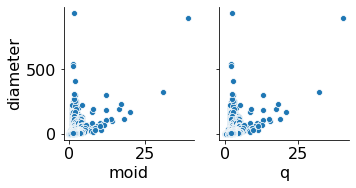

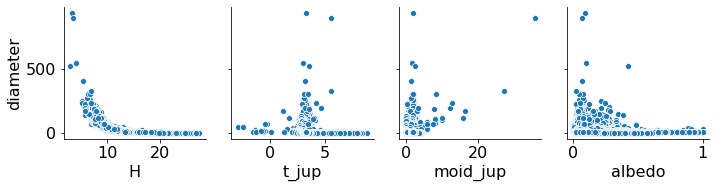

In [17]:
sns.pairplot(data=data, y_vars=['diameter'], x_vars=['moid','q'], dropna=True)
plt.savefig('9_diameter_correlation_1.png')
plt.rc('font', size=BIGGER_SIZE)
plt.show()

sns.pairplot(data=data, y_vars=['diameter'], x_vars=['H','t_jup','moid_jup','albedo'], dropna=True)
plt.savefig('9_diameter_correlation_2.png')
plt.rc('font', size=BIGGER_SIZE)
plt.show()

<b><u>
Studiando la correlazione tra il diametro e le altre dimensioni si può vedere come nessuna tra queste non definisce una correlazione interessante. L'unico che ha un andamento negativo è la magnitudo (H) che offre qualche spunto interessante. Infatti, corpi più grandi si pensa siano più luminosi ma in realtà assorbono maggiormente la luce del sole e non sono effettivamente più luminosi. Inoltre, al di là di Cerere, i corpi celesti più grandi si trovano oltre Giove e Nettuno per cui risultano molto lontani e poco luminosi.
</b></u>

### 2. PHA

<b><u>
Il secondo attributo da studaire è l'indice binario PHA per individuare un asteroide più o meno pericoloso. 
</u></b>

In [18]:
data = reset()

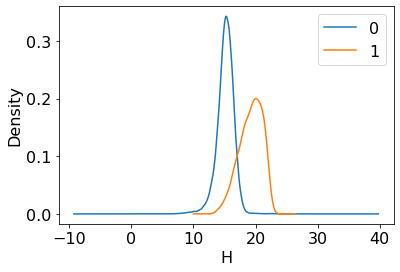

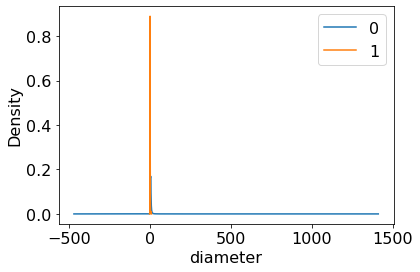

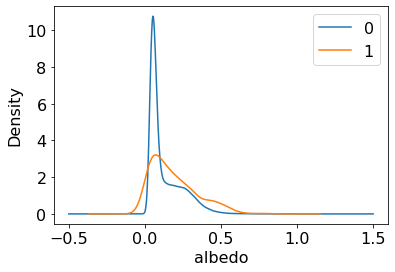

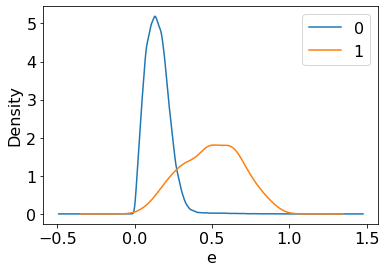

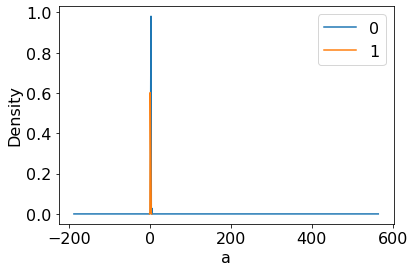

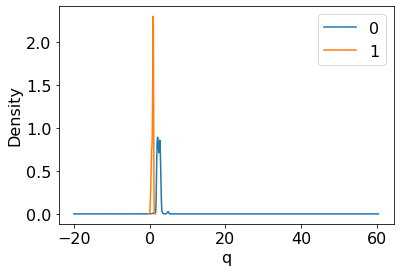

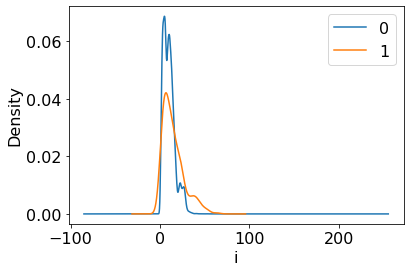

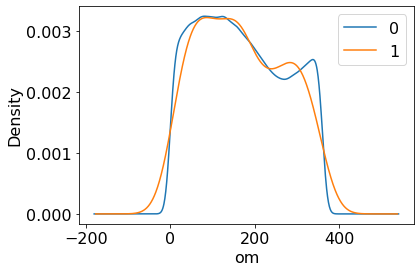

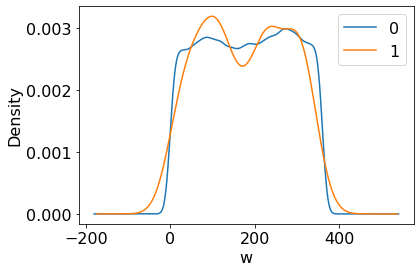

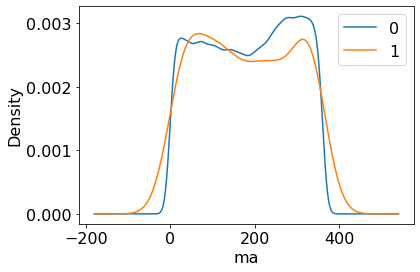

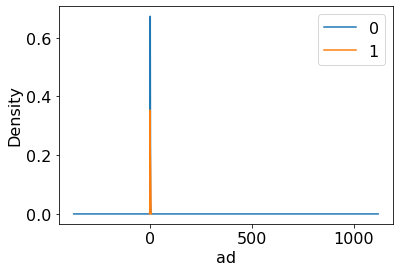

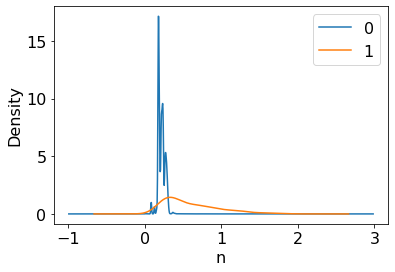

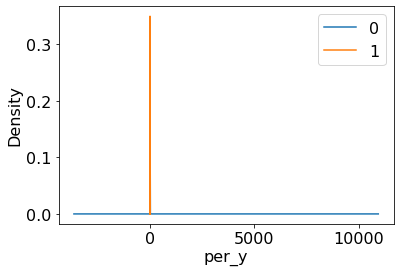

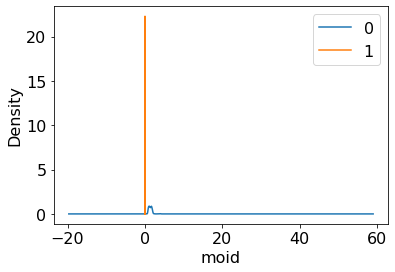

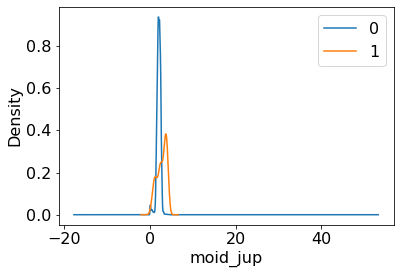

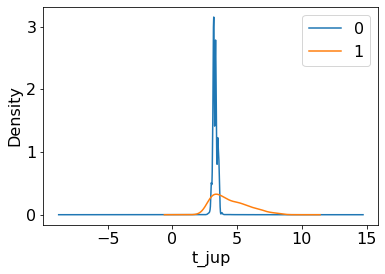

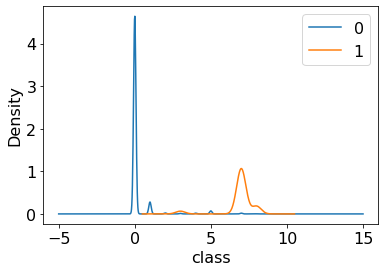

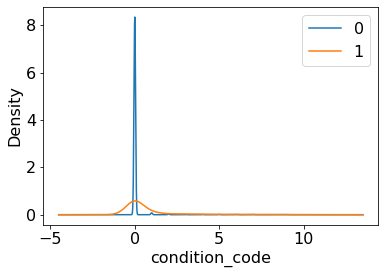

In [19]:
data = data[data.pha.notnull()]
attributes = list(data)
# remove binary / useless attributes
attributes.remove('full_name')
attributes.remove('pha')
attributes.remove('neo')
attributes.remove('first_obs')
attributes.remove('n_obs_used')

for att in attributes:
    data.groupby('pha')[att].plot(kind='kde')
    plt.xlabel(att)
    plt.rc('font', size=BIGGER_SIZE)
    plt.legend()
    plt.show()

<b><u>
Dai grafici possiamo evidenziare come pochi attributi in realtà riescono a fare una buona distinzione i record PHA e NON PHA. In particolare, la magnitudo (H), l'eccentricità (e) e la classe orbitale (class) riescono a stabilare una minima distanza dei valori che distinguono le due classi.
</b></u>

### 3. (Orbital) Class

<b><u>
In fine, l'ultimo attributo è quello della classe orbitale. Per iniziare la sua analisi rispetto gli altri attributi, iniziamo con l'apprendere le varie classi, ad oggi, esistenti.
</b></u>

In [20]:
data = reset()

In [21]:
names = {'MBA': 0, 'OMB': 1, 'MCA': 2, 'AMO': 3, 'IMB': 4, 'TJN': 5, 'CEN': 6, 'APO': 7, 'ATE': 8, 'AST': 9, 'TNO': 10, 'ETc': 11, 'COM': 12}
names = {v: k for k, v in names.items()}
data['class'] = (data['class'].map(names))

##### <u>Definizione delle classi orbitali attualmente presenti, rispetto anche alla loro traduzione nel dataset:</u>

- 0 MBA -> Main Belt Asteroid : Asteroids with orbital elements;

- 1 OMB -> Outer Main Belt : Asteroids with orbital elements;

- 2 MCA -> Mars Crossing Asteroid : Asteroids that cross the orbit of Mars;

- 3 AMO -> Amor : Near-Earth asteroid orbits similar to that of 1221 Amor;

- 4 IMB -> Inner Main Belt : Asteroids with orbital elements;

- 5 TJN -> Jupiter Trojan : Asteroids trapped in Jupiter's L4/L5 Lagrange points;

- 6 CEN -> Centaur : Objects with orbits between Jupiter and Neptune;

- 7 APO -> Apollo : Near-Earth asteroid orbits which cross the Earth's orbit similar to that of 1862 Apollo;

- 8 ATE -> Atene : Near-Earth asteroid orbits similar to that of 2062 Aten;

- 9 AST -> Asteroid : Asteroid orbit not matching any defined orbit class;

- 10 TNO -> TransNeptunian Object : Objects with orbits outside Neptune;

- 11 ETc -> Encke-type Comet : Encke-type comet;

- 12 COM -> Comete : Comet orbit not matching any defined orbit class;

<b><u>
Rimuoviamo alcuni parametri non utili alla compresione della classe orbitale poiché attributi non riferiti a grandezze fisiche. 
</b></u>

In [22]:
data = data[data.pha.notnull()]
attributes = list(data)
# remove binary / useless attributes
attributes.remove('full_name')
attributes.remove('pha')
attributes.remove('neo')
attributes.remove('first_obs')
attributes.remove('n_obs_used')
attributes.remove('class')

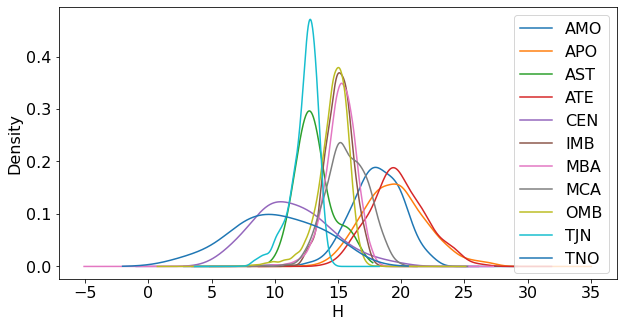

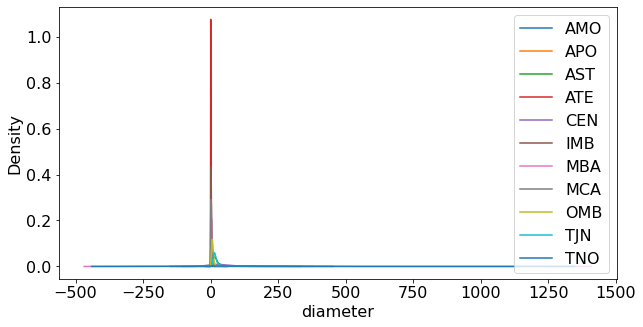

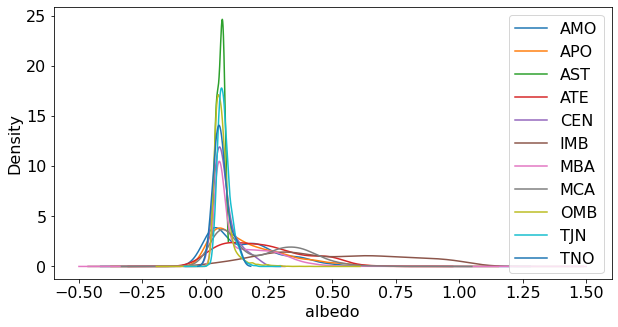

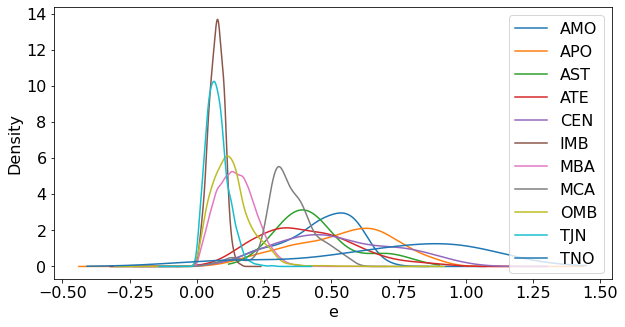

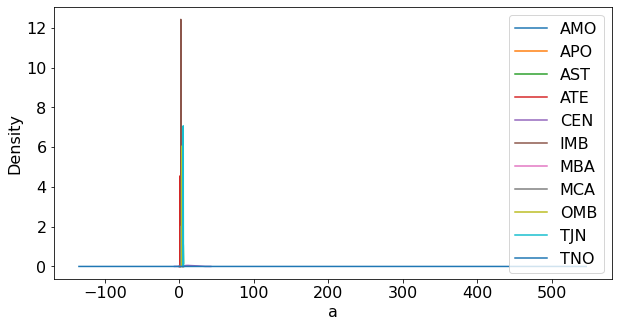

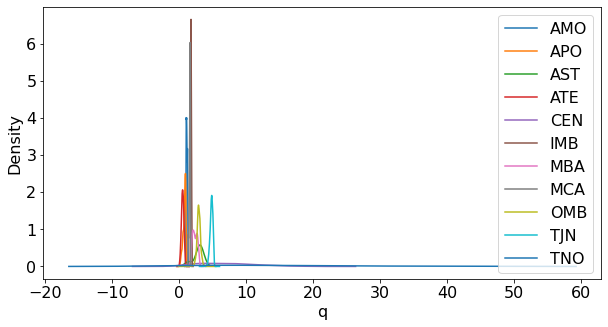

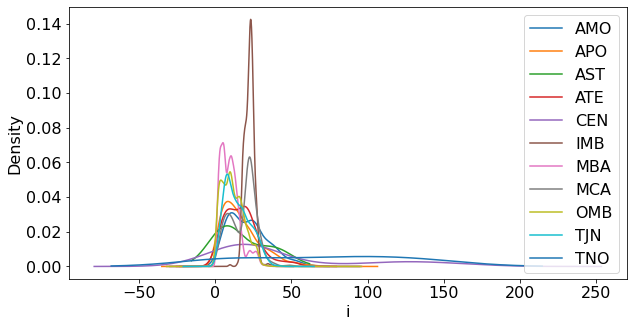

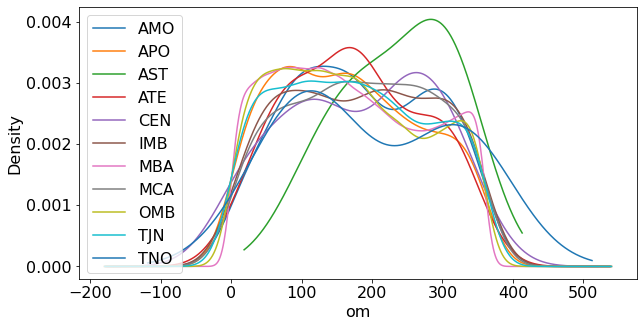

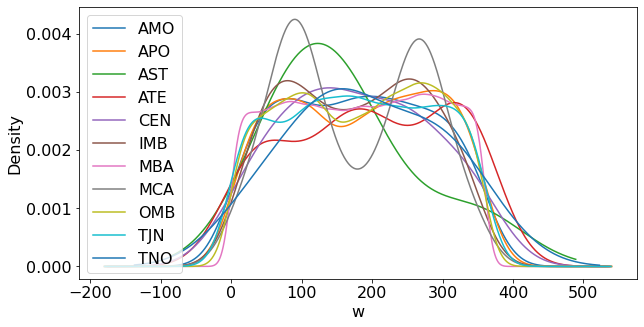

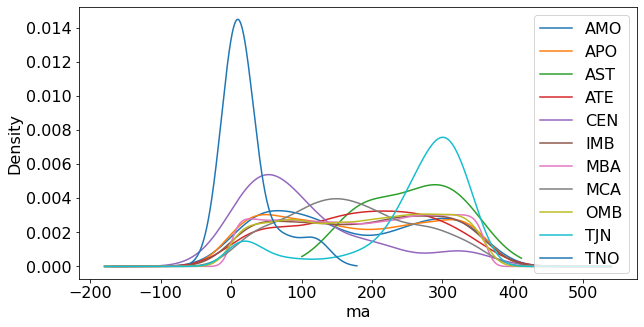

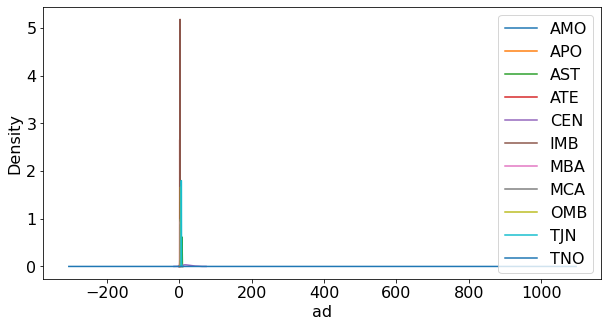

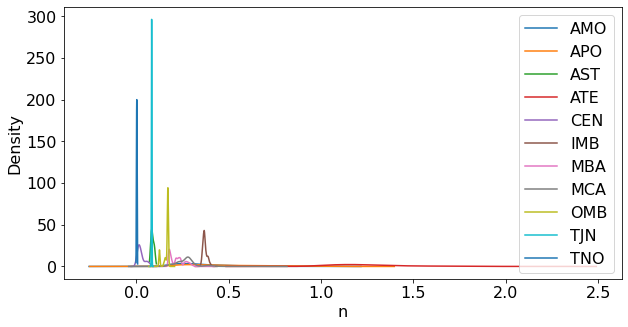

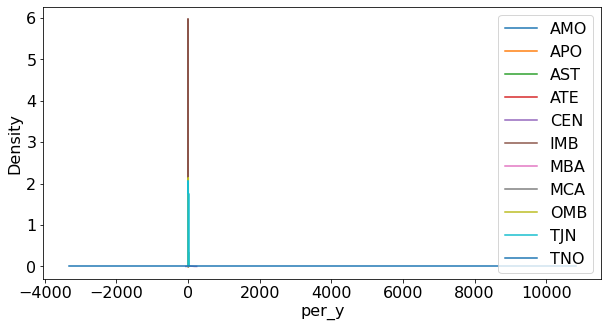

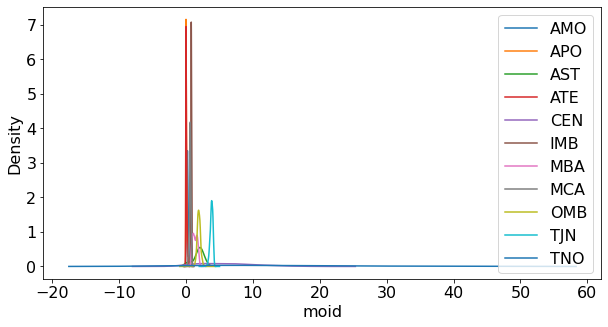

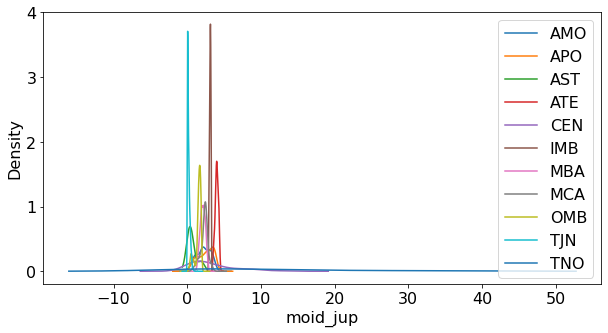

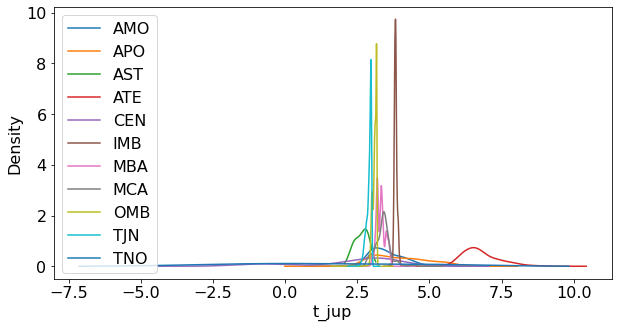

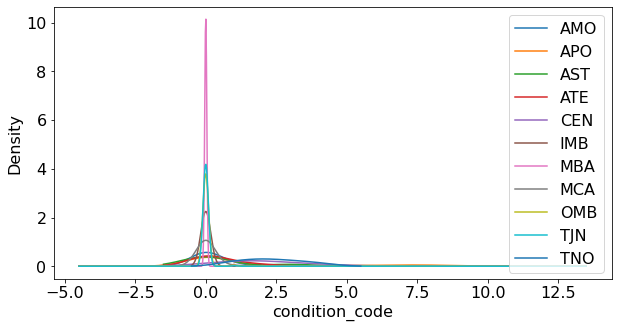

In [23]:
for att in attributes:
    plt.figure(figsize=(10,5))
    data.groupby('class')[att].plot(kind='kde')
    plt.xlabel(att)
    plt.rc('font', size=BIGGER_SIZE)
    plt.legend()
    plt.show()

<b><u>
Come nel caso dell'attributo PHA, non tutti hanno distinguono le varie classi e quindi selezioniamo i più interessanti: diametro, semiasse maggiore, distanza del perielio ed eccentricità.
</b></u>

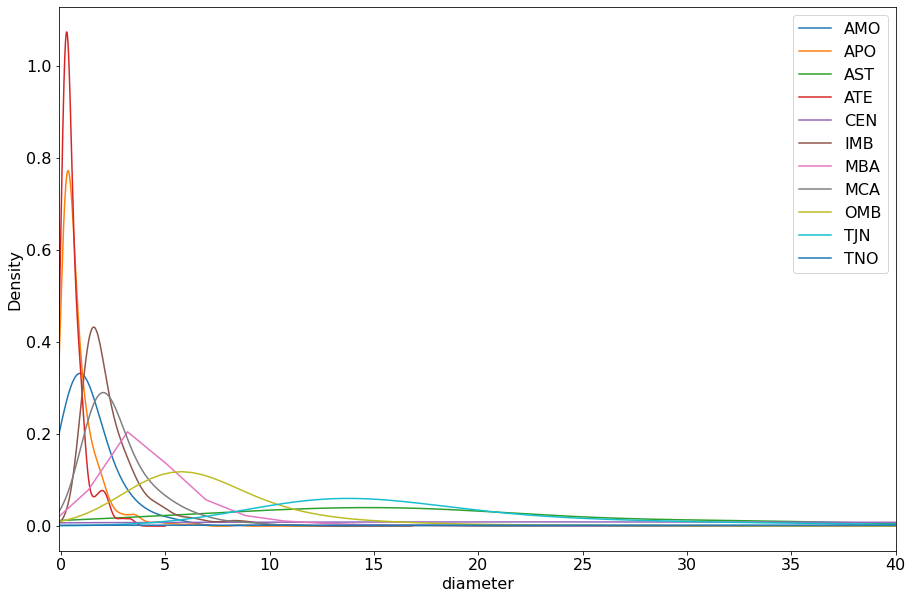

In [24]:
plt.figure(figsize=(15,10))
data.groupby('class').diameter.plot(kind='kde')
plt.xlim(-0.1, 40)
plt.xlabel('diameter')
plt.rc('font', size=BIGGER_SIZE)
plt.legend()
plt.show()

<b><u>
Dalla relazione con il diametro possiamo estrarre poche informazioni in quanto il diametro non necessariamente coincide con una distanza maggiore o minore. Ciò che possiamo affermare è solo la differenza tra oggetti più vicini ai pianeti interni e quelli ai pianeti esterni del sistema solare.

Infatti, spostandoci verso l'esterno, sembrerebbe che il diametro cresca. Non è tuttavia una relazione forte.
</b></u>

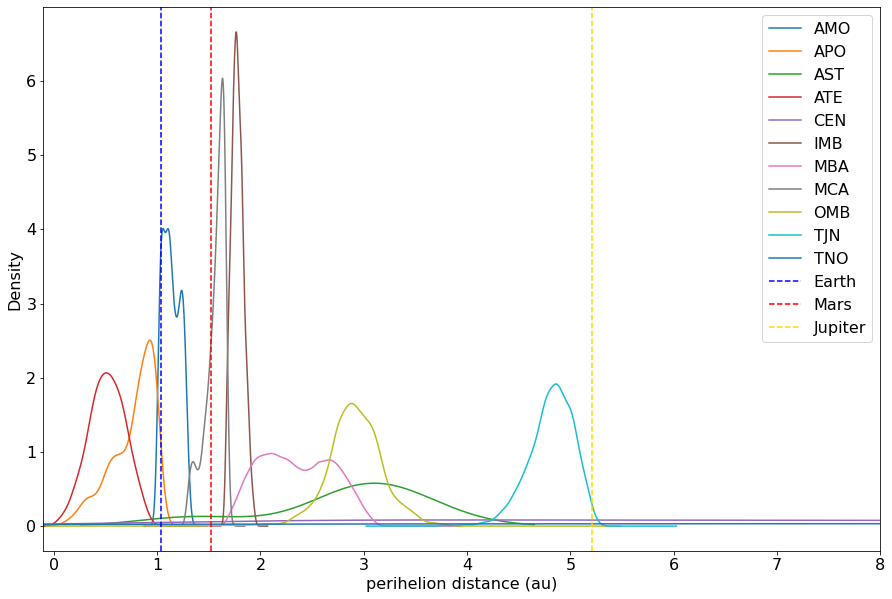

In [25]:
plt.figure(figsize=(15,10))
data.groupby('class').q.plot(kind='kde')
plt.axvline(1.04, color='blue', label='Earth', ls='--')
plt.axvline(1.524 , color='red', label='Mars', ls='--')
plt.axvline(5.209 , color='gold', label='Jupiter', ls='--')
plt.xlim(-0.1, 8)
plt.xlabel('perihelion distance (au)')
plt.rc('font', size=BIGGER_SIZE)
plt.legend()
plt.show()

<b><u>
Evidente è invece il legame della distanza del perielio. Infatti, orbite con perielio più grande le si trova man mano che ci si allontana dal Sole come normale che sia.
    
Nel grafico evidenziamo i tre pianeti chiave, ovvero Terra, Marte e Giove, intorno ai quali troviamo la maggior parte degli asteroidi. Gli oggetti della classe TNO, Trans-Nettuniani, sono caratterizzati da un perielio molto lontano: orbitano, infatti, oltre Nettuno che ha distanza di circa 30 AU dal Sole.
</b></u>

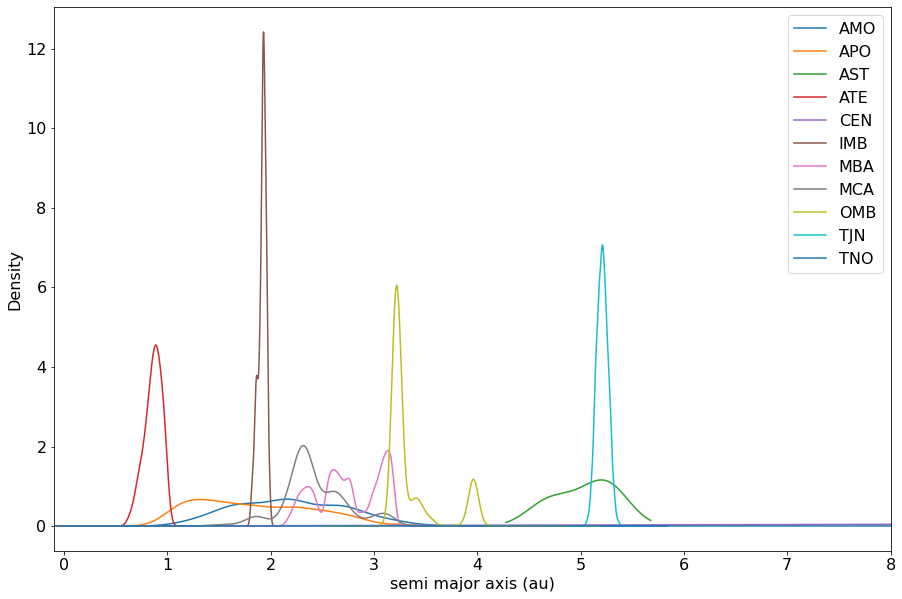

In [26]:
plt.figure(figsize=(15,10))
data.groupby('class').a.plot(kind='kde')
plt.xlim(-0.1, 8)
plt.xlabel('semi major axis (au)')
plt.rc('font', size=BIGGER_SIZE)
plt.legend()
plt.show()

<b><u>
Lo stesso andamento del perielio lo ha pure il semiasse maggiore, seppur in maniera meno distinta.
</b></u>

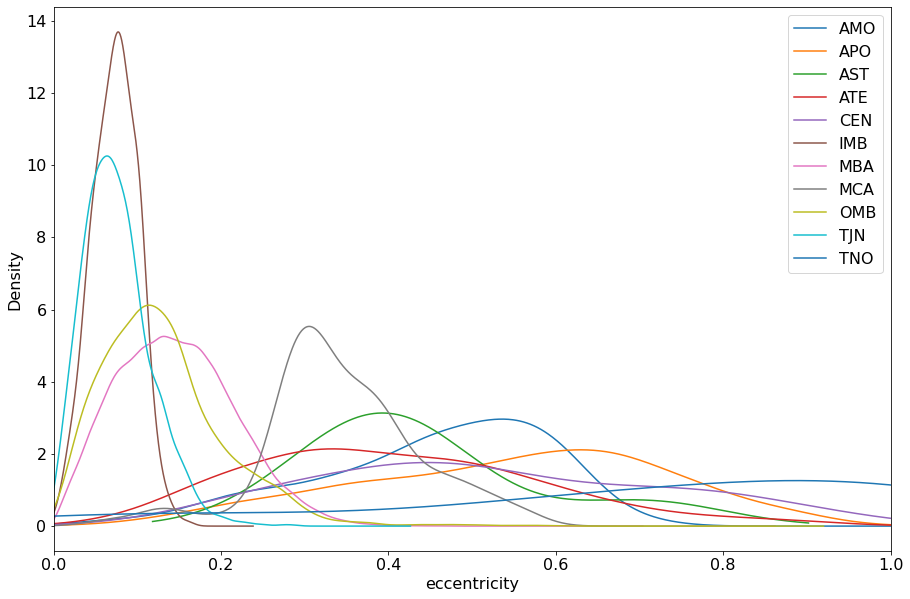

In [27]:
plt.figure(figsize=(15,10))
data.groupby('class').e.plot(kind='kde')
plt.xlim(0,1)
plt.xlabel('eccentricity')
plt.rc('font', size=BIGGER_SIZE)
plt.legend()
plt.show()

<b><u>
Infine, l'ultimo attributo di cui studiare la correlazione è l'eccentricità. Più i corpi sono lontani dal Sole e dai pianeti interni, più la loro orbita risulta ellittica; più sono vicini più è circolare.  
</b></u>

## 4. Esplorazione degli attributi: Trasformazioni

<b><u>
Essendo in ambito scientifico, proviamo ad analizzare i dati in merito a trasformazioni interessanti:
    
    1. Logaritmo
    2. Elevazione al quadrato
    3. Radice quadrato
    4. Reciproco
</b></u>

In [28]:
data = reset()

<b><u>
Lo facciamo sfruttando le funzioni contenute nella libreria numpy e solo su alcune grandezze fisicamente interessanti. 
</b></u>

In [29]:
for column in ['albedo','n','H','ad','e','om','i','q']:
    data['log('+column+')'] = data[column].apply(np.log)
    data['square('+column+')'] = data[column].apply(np.square)
    data['root('+column+')'] = data[column].apply(np.square)
    data['reciprocal('+column+')'] = data[column].apply(np.reciprocal)

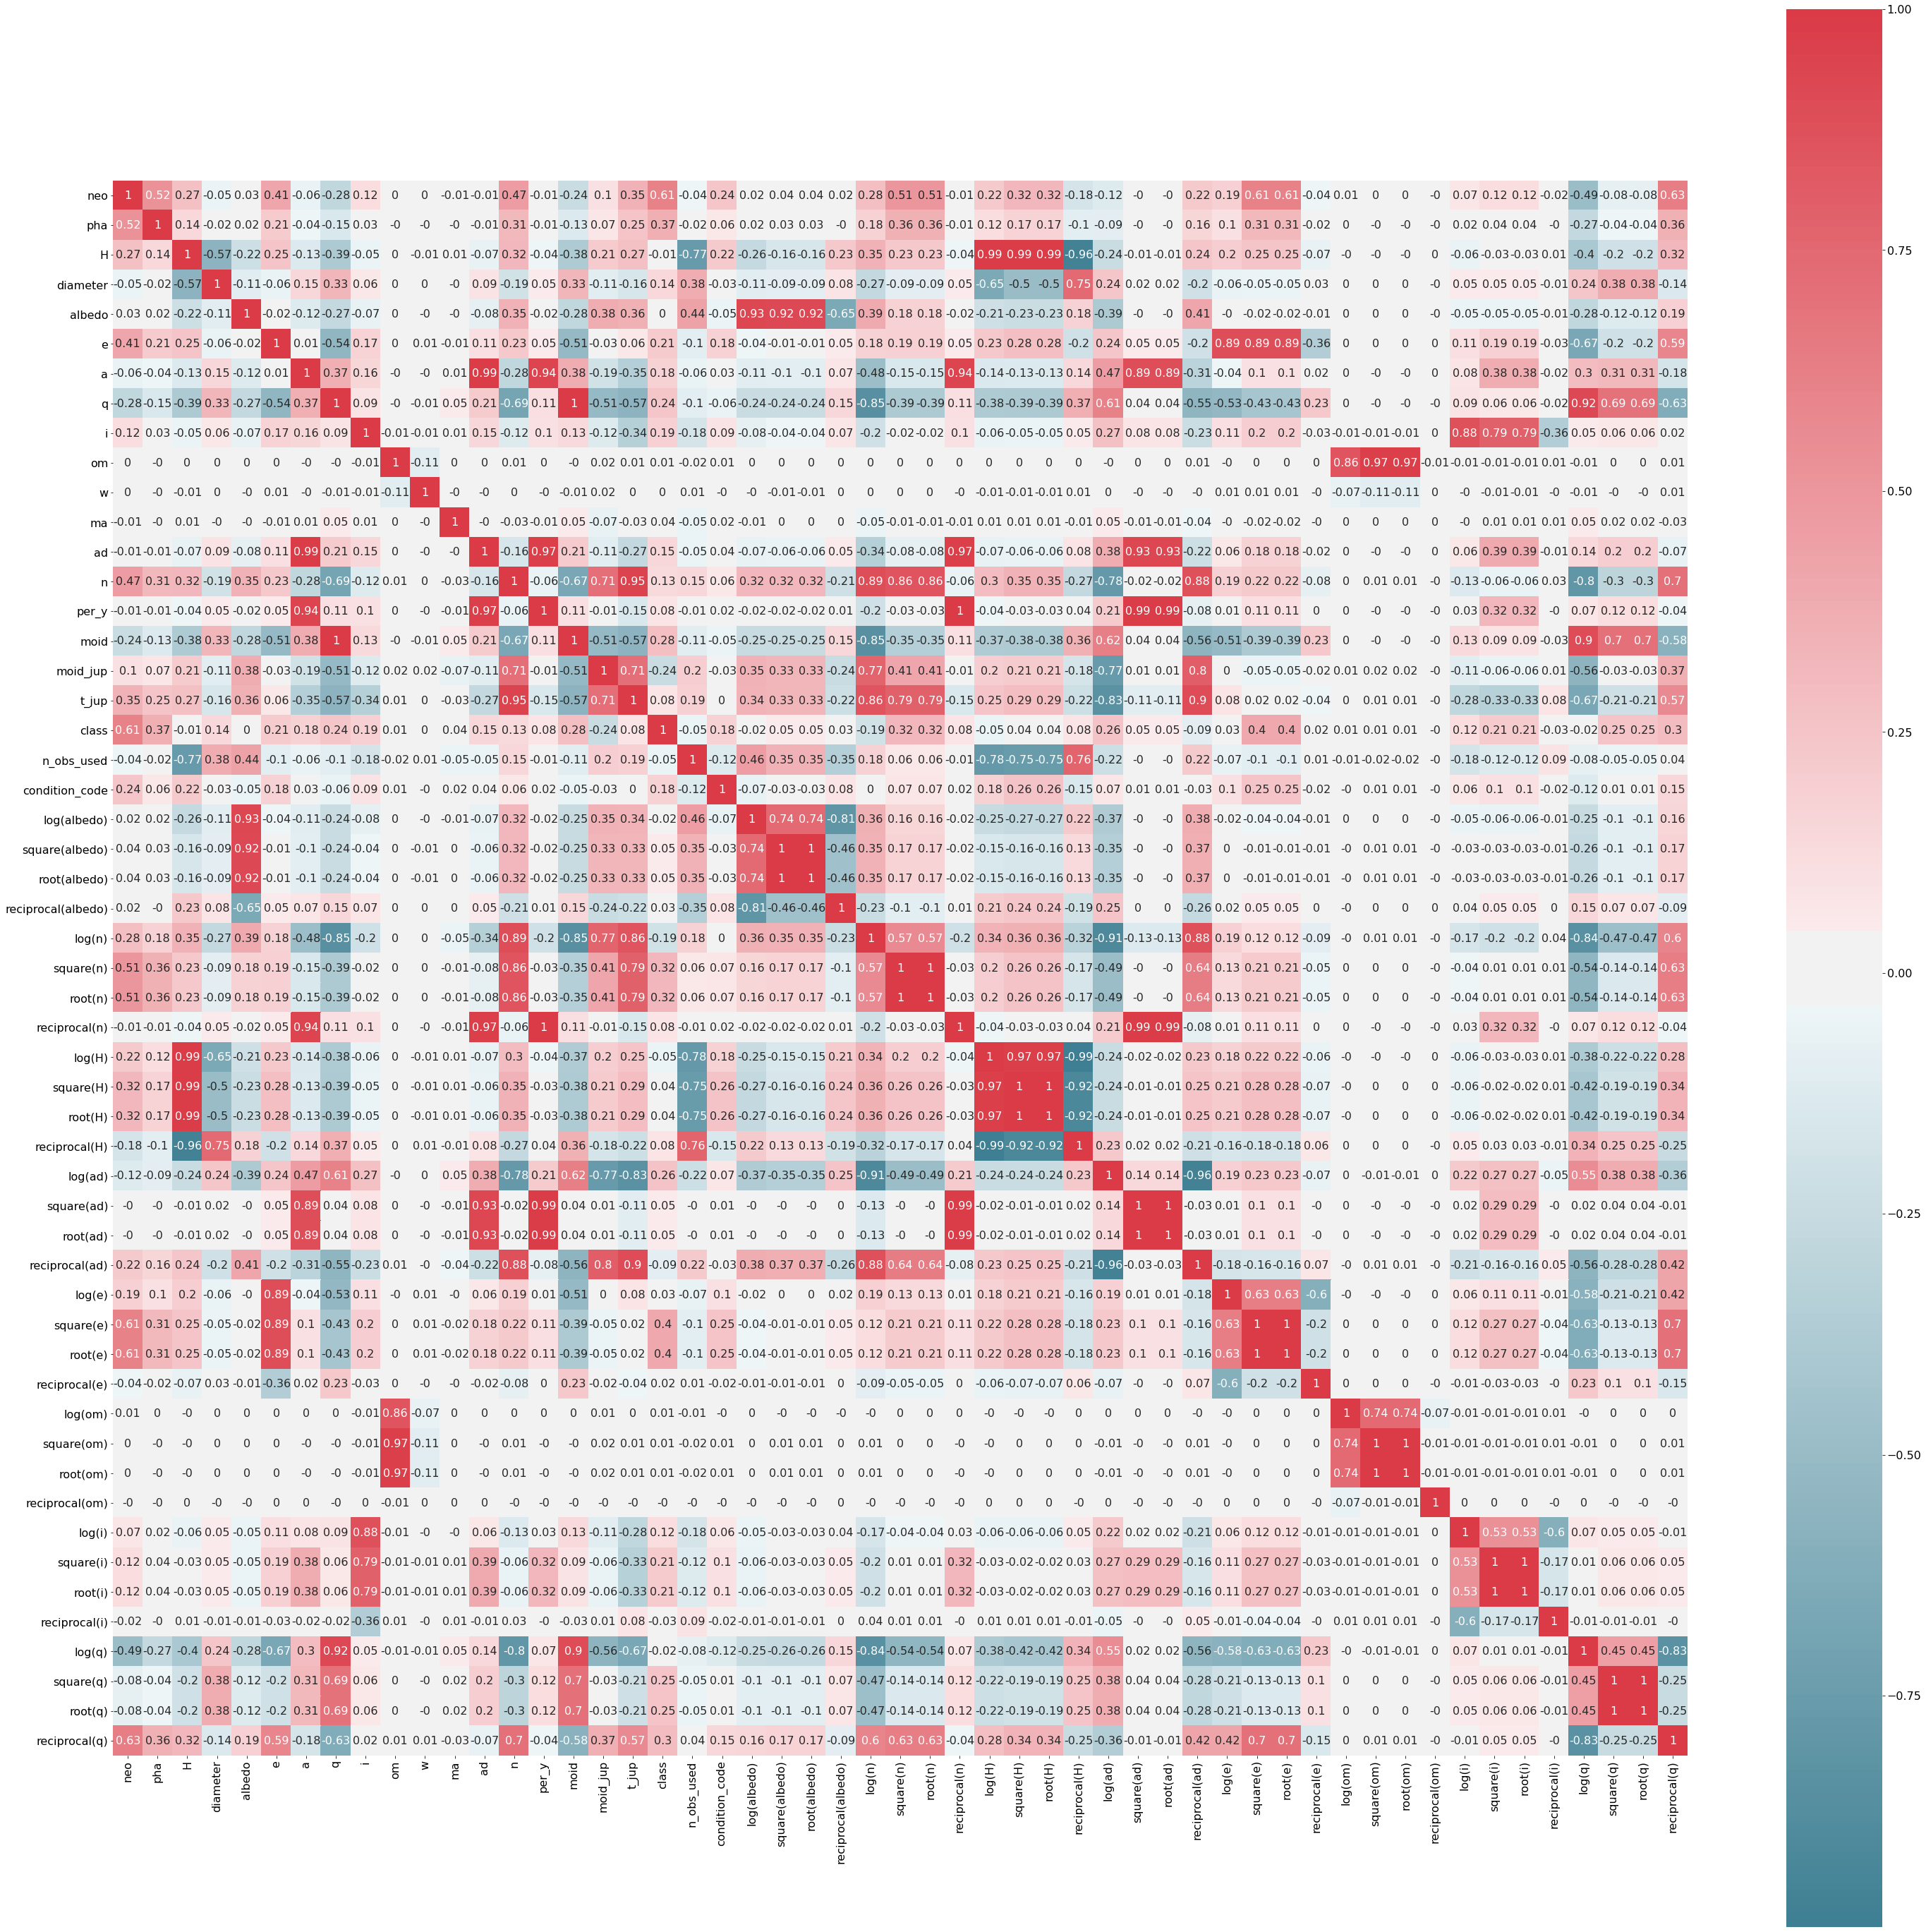

In [30]:
corr = data.corr()
corr = np.round(corr, 2)
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()

<b><u>
Studiare tuttavia le correlazioni con le trasformazioni risulta essere molto pesante e dispersivo. Tuttavia, prendiamo l'attributo più interessante rispetto eventuali formule matematica, ovvero il diametro, e controlliamo eventuali legami.
</b></u>

### Logarithm, Square, Sqrt, Reciprocal

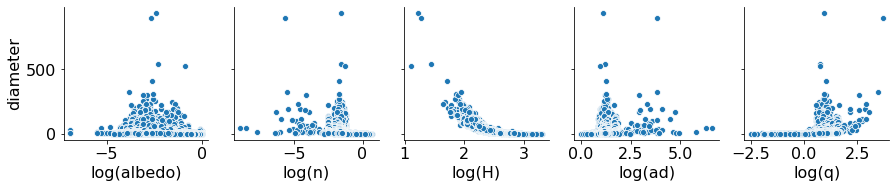

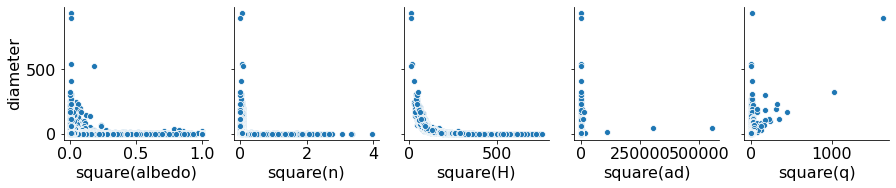

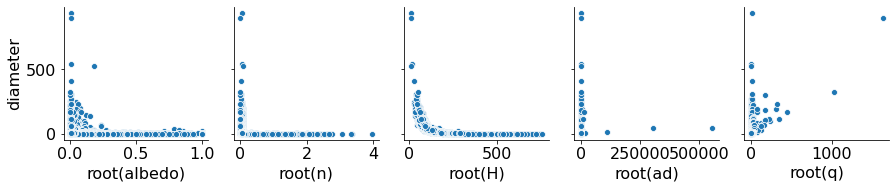

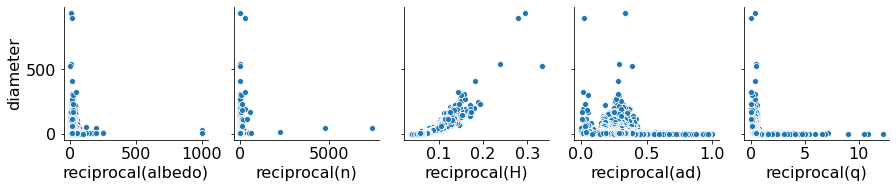

In [31]:
sns.pairplot(data=data, y_vars=['diameter'], 
             x_vars=['log(albedo)','log(n)','log(H)','log(ad)','log(q)'], 
             dropna=True)

sns.pairplot(data=data, y_vars=['diameter'], 
             x_vars=['square(albedo)','square(n)','square(H)','square(ad)','square(q)'], 
             dropna=True)

sns.pairplot(data=data, y_vars=['diameter'], 
             x_vars=['root(albedo)','root(n)','root(H)','root(ad)','root(q)'], 
             dropna=True)

sns.pairplot(data=data, y_vars=['diameter'], 
             x_vars=['reciprocal(albedo)','reciprocal(n)','reciprocal(H)','reciprocal(ad)','reciprocal(q)'], 
             dropna=True)
plt.rc('font', size=BIGGER_SIZE)
plt.show()

<b><u>
Nonostante le trasformazioni, non tutti hanno un significato evidente. L'unico ad avere un senso di correlazione continua ad essere la magnitudo (H). Le restanti grandezze non esprimono alcuna correlazione lineare.
    
Tuttavia, potrebbero esistere correlazioni non lineare che con questi metodi non possiamo esprime.
</b></u>

### Test

In [32]:
data = reset()

names = {'MBA': 0, 'OMB': 1, 'MCA': 2, 'AMO': 3, 'IMB': 4, 'TJN': 5, 'CEN': 6, 'APO': 7, 'ATE': 8, 'AST': 9, 'TNO': 10, 'ETc': 11, 'COM': 12}
names = {v: k for k, v in names.items()}
data['class'] = (data['class'].map(names))

In [33]:
data_0 = data[data['class']=='MBA'].sample(100)
data_1 = data[data['class']=='OMB'].sample(100)
data_2 = data[data['class']=='TJN'].sample(100)
data_3 = data[data['class']=='APO'].sample(100)
data_4 = data[data['class']=='MCA'].sample(100)
data_5 = data[data['class']=='IMB'].sample(100)
data_6 = data[data['class']=='AMO'].sample(100)
data_7 = data[data['class']=='ATE'].sample(100)
data_8 = data[data['class']=='CEN']
data_9 = data[data['class']=='AST']
data_10 = data[data['class']=='TNO']

data = pd.concat([data_0, data_1, data_2, data_3, data_4, data_5, data_6,
                    data_7, data_8, data_9, data_10])

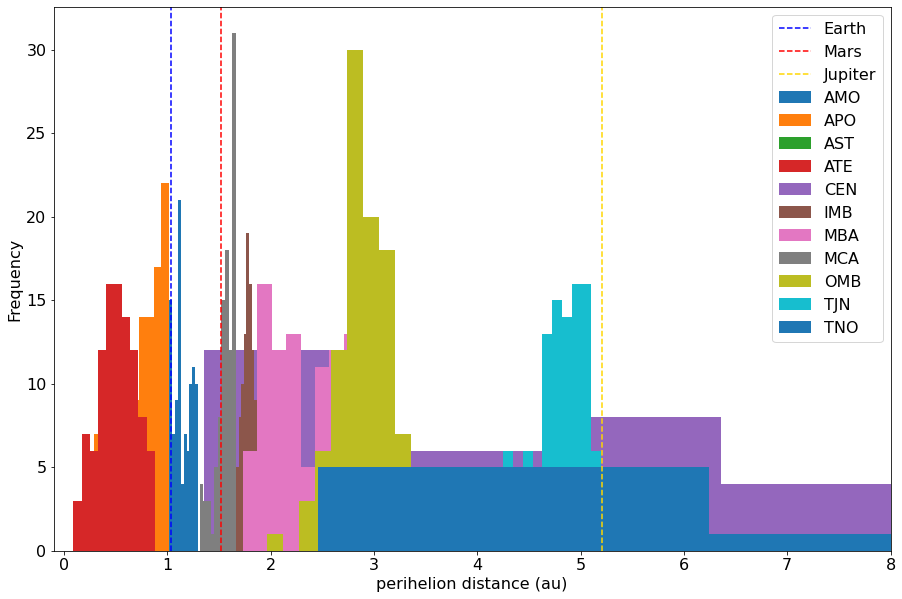

In [34]:
plt.figure(figsize=(15,10))
data.groupby('class').q.plot(kind='hist')
plt.axvline(1.04, color='blue', label='Earth', ls='--')
plt.axvline(1.524 , color='red', label='Mars', ls='--')
plt.axvline(5.209 , color='gold', label='Jupiter', ls='--')
plt.xlim(-0.1, 8)
plt.xlabel('perihelion distance (au)')
plt.rc('font', size=BIGGER_SIZE)
plt.legend()
plt.show()

In [38]:
data = reset()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135434 entries, 0 to 977556
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       135434 non-null  object 
 1   neo             135434 non-null  int64  
 2   pha             135434 non-null  int64  
 3   H               135434 non-null  float64
 4   diameter        135434 non-null  float64
 5   albedo          135434 non-null  float64
 6   e               135434 non-null  float64
 7   a               135434 non-null  float64
 8   q               135434 non-null  float64
 9   i               135434 non-null  float64
 10  om              135434 non-null  float64
 11  w               135434 non-null  float64
 12  ma              135434 non-null  float64
 13  ad              135434 non-null  float64
 14  n               135434 non-null  float64
 15  per_y           135434 non-null  float64
 16  moid            135434 non-null  float64
 17  moid_jup  

In [39]:
for column in ['per_y']:
    data['log('+column+')'] = data[column].apply(np.log)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135434 entries, 0 to 977556
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       135434 non-null  object 
 1   neo             135434 non-null  int64  
 2   pha             135434 non-null  int64  
 3   H               135434 non-null  float64
 4   diameter        135434 non-null  float64
 5   albedo          135434 non-null  float64
 6   e               135434 non-null  float64
 7   a               135434 non-null  float64
 8   q               135434 non-null  float64
 9   i               135434 non-null  float64
 10  om              135434 non-null  float64
 11  w               135434 non-null  float64
 12  ma              135434 non-null  float64
 13  ad              135434 non-null  float64
 14  n               135434 non-null  float64
 15  per_y           135434 non-null  float64
 16  moid            135434 non-null  float64
 17  moid_jup  

In [40]:
data = data[data.diameter.notnull()]
corr = data.corr()
corr['diameter'].sort_values(ascending=False)
corr['diameter']

neo              -0.045263
pha              -0.024787
H                -0.566591
diameter          1.000000
albedo           -0.112695
e                -0.061383
a                 0.146373
q                 0.327872
i                 0.062511
om                0.001639
w                 0.003253
ma               -0.001776
ad                0.093724
n                -0.191067
per_y             0.050257
moid              0.331427
moid_jup         -0.112687
t_jup            -0.160093
class             0.138129
n_obs_used        0.381346
condition_code   -0.026257
log(per_y)        0.272788
Name: diameter, dtype: float64

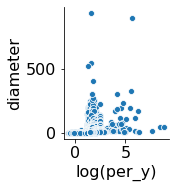

In [41]:
sns.pairplot(data=data, y_vars=['diameter'], 
             x_vars=['log(per_y)'], 
             dropna=True)
plt.show()